In [1]:
# Simulation relevant stuff
machine = 'mac'
#machine = 'magny'
machine = 'virgo'

if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
    


In [2]:
import sys
sys.path.append("..")
import numpy as np

import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

import sys
sys.path.append("../../arepo-snap-util/build/lib.linux-x86_64-3.6/areposnap/")
#from parse_particledata import parse_particledata

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy import stats

from galpy.potential import plotDensities, evaluateDensities, plotPotentials
from galpy.potential import MiyamotoNagaiPotential as MP
from galpy.potential import HernquistPotential as HP
from galpy.potential import NFWPotential as NFWP
from galpy.util import bovy_conversion

from auriga_basics import *
from decomposition import *
from astropy import units as u
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D


from matplotlib import rcParams
import copy

from scipy import stats

%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['figure.figsize'] = (6.5,5.)

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
test1 = decomposition(machine = machine)

Load snapshot.
level   : 4
halo	: 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

Carry out decomposition.
computing star properties
computing histograms
Calculate disk indices.
Calculate spheroid indices.
Calculate halo indices.
Load positions and masses of simulation data.
computing star properties
computing histograms
Import galpy parameters.
Setup galpy potential.
Set plot options.


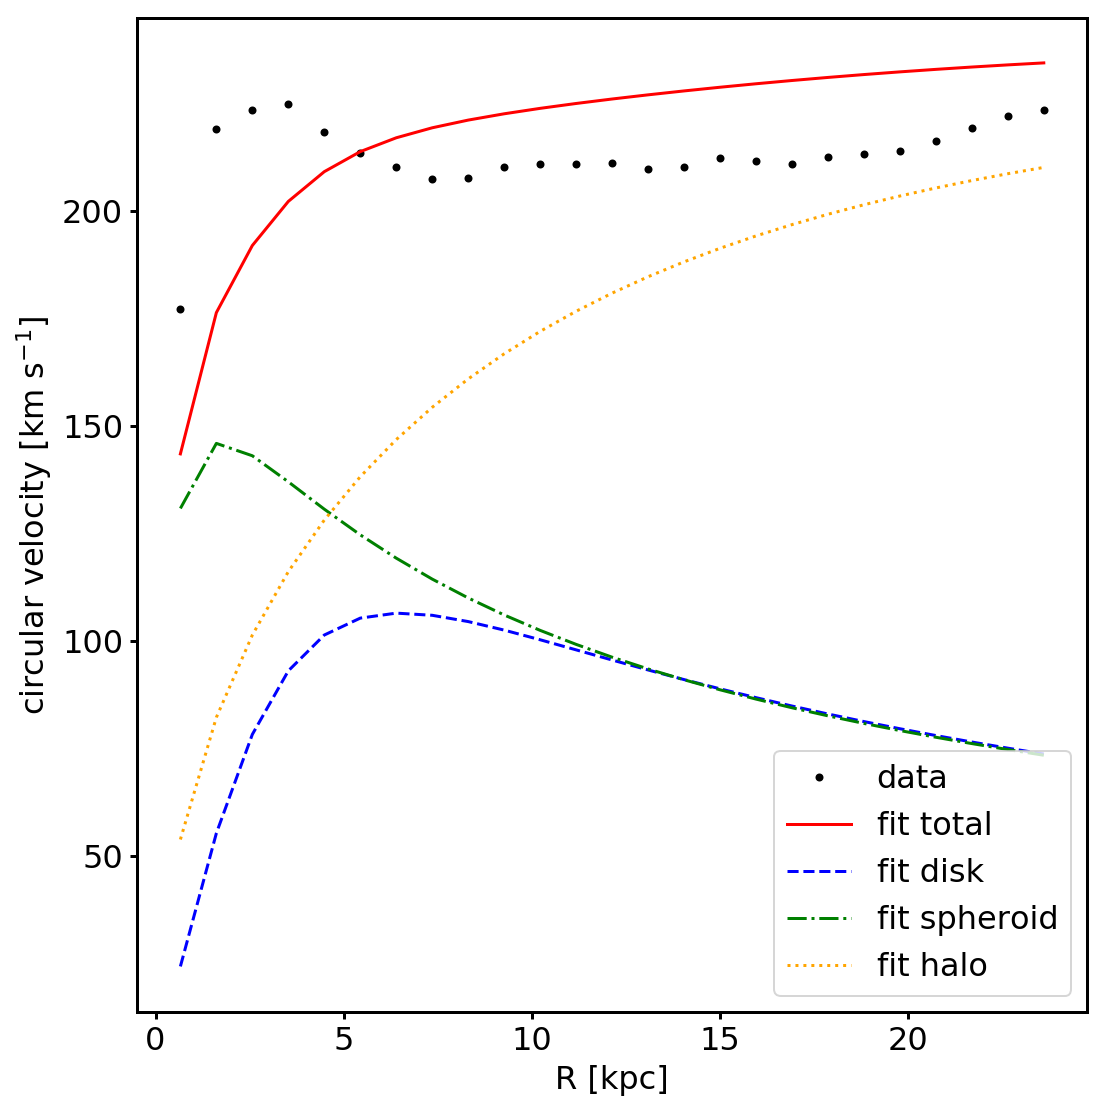

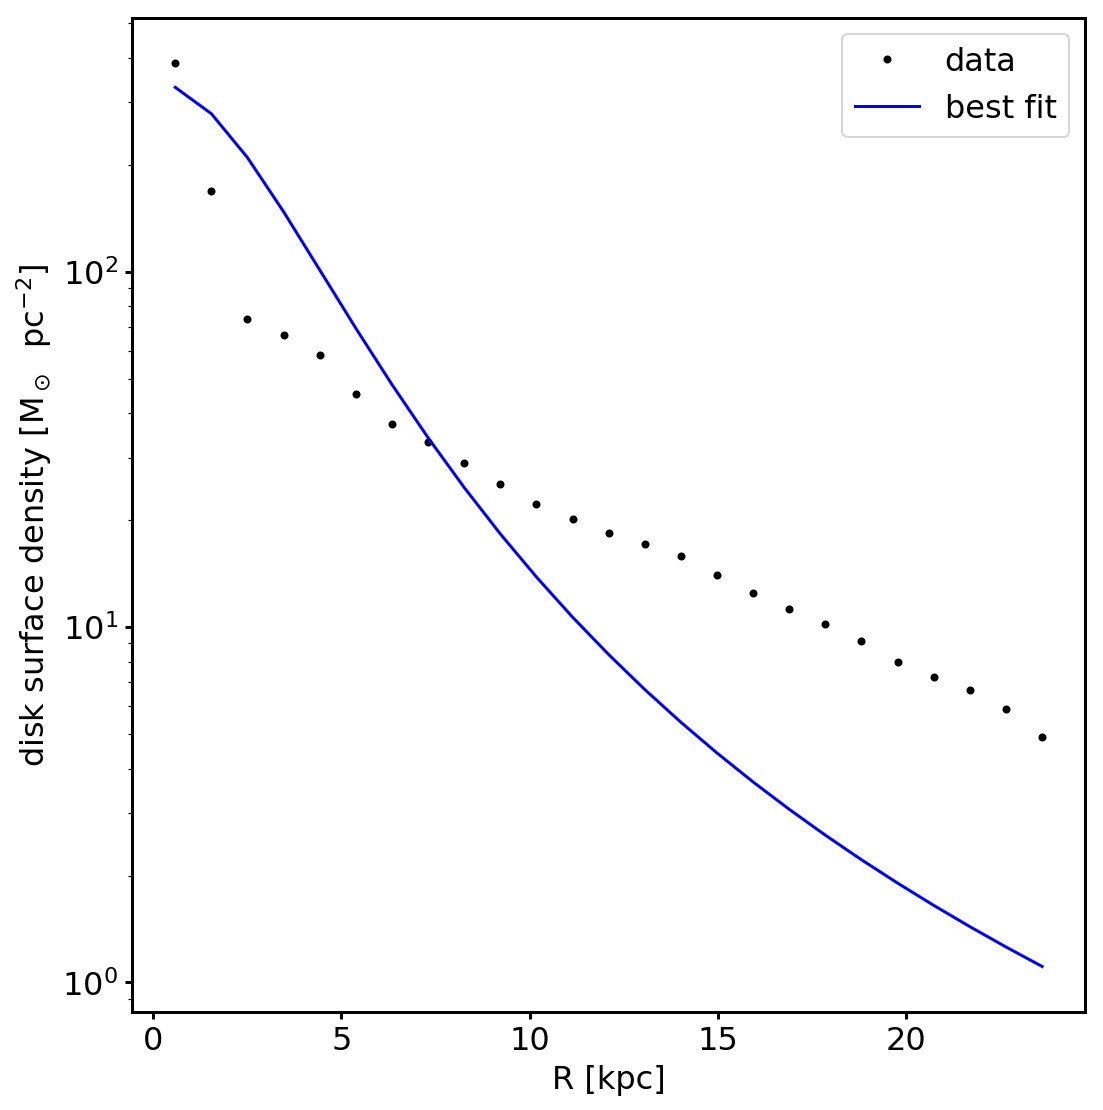

AttributeError: 'decomposition' object has no attribute 'voldens_disk_data'

In [4]:
test1.plot_circvel()
test1.plot_surfdens_disk()
test1.plot_voldens_disk(fix_z = False, fix_R = True, R_dat_kpc = 5.)

In [ ]:
plt.hist2d(test1.x_halo_kpc, test1.y_halo_kpc, bins = 101, norm = colors.LogNorm())

In [ ]:
print(len(test1.r_halo_kpc), len(test1.s.mass[test1.i_halo][test1.i_r_inhalo]))

In [ ]:
test1.plot_surfdens_halo()
test1.plot_voldens_halo()

In [ ]:
test1.plot_surfdens_spher()
test1.plot_voldens_spher()

In [ ]:
test2 = decomposition(use_masses = True, use_n = False, machine = machine)
test2.plot_circvel(use_masses = True, use_n = False)
test2.plot_surfdens(use_masses = True, use_n = False)
test2.plot_voldens(use_masses = True, use_n = False)

In [ ]:
np.where((test1.s.type ==1 ) +  (test1.s.type == 2) + (test1.s.type == 3), 1, 0)

In [ ]:
np.sum(np.where((test1.s.type ==1 ) +  (test1.s.type == 2) + (test1.s.type == 3), 1, 0))

In [ ]:
np.sum(np.where((test1.s.type ==1 ), 1, 0))